Initializing simulation...
Mesh step (micron): [5.00e-02, 5.00e-02, 5.00e-02].
Simulation domain in number of grid points: [120, 120, 120].
Total number of grid points: 1.73e+06.
Total number of time steps: 2308.
Estimated data size (GB) of monitor xz plane: 0.0007.
Uploading the json file...
Project "quickstart-1" status: success...    

Applying source normalization to all frequency monitors using source index 0.


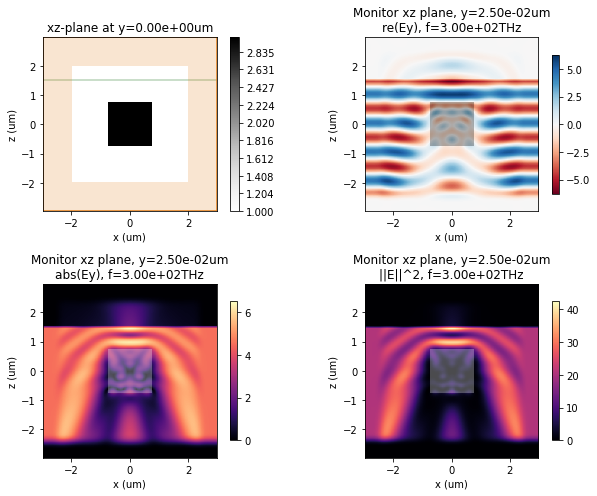

In [1]:
# <- click this arrow to run the example

# External package import
import numpy as np
import matplotlib.pyplot as plt

# install tidy3d for this colab notebook
!pip install -q tidy3d

# tidy3d import
import tidy3d as td
from tidy3d import web

# set up parameters of simulation
resolution = 20
sim_size = [4, 4, 4]
pml_layers = [resolution, resolution, resolution]
fcen = 3e14
fwidth = 1e13
run_time = 2/fwidth

# create structure
material = td.Medium(n=2.0, k=0.2, freq=fcen)
square = td.Box(center=[0, 0, 0], size=[1.5, 1.5, 1.5], material=material)

# create source
source = td.PlaneWave(
    injection_axis='-z',
    position=1.5,
    source_time = td.GaussianPulse(
        frequency=fcen,
        fwidth=fwidth),
    polarization='y')

# create monitor
freq_mnt = td.FreqMonitor(center=[0, 0, 0], size=[6, 0, 6], freqs=[fcen], name='xz plane')

# Initialize simulation
sim = td.Simulation(size=sim_size,
                    resolution=resolution, 
                    structures=[square], 
                    sources=[source],
                    monitors=[freq_mnt],
                    run_time=run_time,
                    pml_layers=pml_layers)

# run simulation
project = web.new_project(sim.export(), task_name='quickstart')
web.monitor_project(project['taskId'])

# download results
web.download_results(project['taskId'], target_folder='out/')
sim.load_results('out/monitor_data.hdf5')

# plot results
clim = (1, 3)
fig, (ax_top, ax_bot) = plt.subplots(2, 2, figsize=(9, 7), tight_layout=True)

sim.viz_eps_2D(normal='y', ax=ax_top[0], cbar=True, clim=clim, monitor_alpha=0)
im_re = sim.viz_field_2D(freq_mnt, ax=ax_top[1], cbar=True, comp='y', val='re')

im_ab = sim.viz_field_2D(freq_mnt, ax=ax_bot[0], cbar=True, comp='y', val='abs')
im_int = sim.viz_field_2D(freq_mnt, ax=ax_bot[1], cbar=True, comp='y', val='int')

plt.show()